In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/humor-detection/y_train.pickle
/kaggle/input/humor-detection/y_test.pickle
/kaggle/input/humor-detection/X_train.pickle
/kaggle/input/humor-detection/X_test.pickle
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/web_scraper.py
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/write_functions.py
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/separate_by_sent_length.py
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/Extract_from_twitter.py
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/README.md
/kaggle/input/humor-detection/Short-Text-Corpus-For-Humor-Detection-master/Short-Text-Corpus-For-Humor-Detection-master/Dedupli

In [2]:
pip install -U sentence-transformers

     |████████████████████████████████| 66 kB 473 kB/s eta 0:00:011
     |████████████████████████████████| 1.1 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 5.6 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-py3-none-any.whl size=101994 sha256=67735a21777d61c4a48f83d5dd052b7d833e2f69640c942b1388302baee47d09
  Stored in directory: /root/.cache/pip/wheels/1c/43/65/fe0f3ea9327623e749a79eb5dfad85a809c84064b1cc4682c1
Successfully built sentence-transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1
  Attempting uninstall: transformers
    Found existing installation: transformers 3.0.2
    Uninstalling transformers-3.0.2:
      Successfully uninstalled transformers-3.0.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sentence_transformers import SentenceTransformer, models
from torch import nn
from sklearn.manifold import TSNE

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [22]:
xtrain = pd.read_pickle('/kaggle/input/humor-detection/X_train.pickle')
ytrain = pd.read_pickle('/kaggle/input/humor-detection/y_train.pickle')

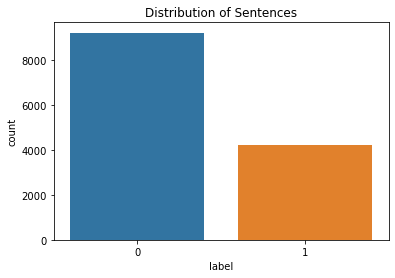

In [23]:
# Loading Data into Panda and looking at the distribution
d = {'text' : xtrain , 'label' : ytrain}
train = pd.DataFrame(data = d)
sns.countplot(x='label',data=train)
plt.title('Distribution of Sentences')
plt.show()

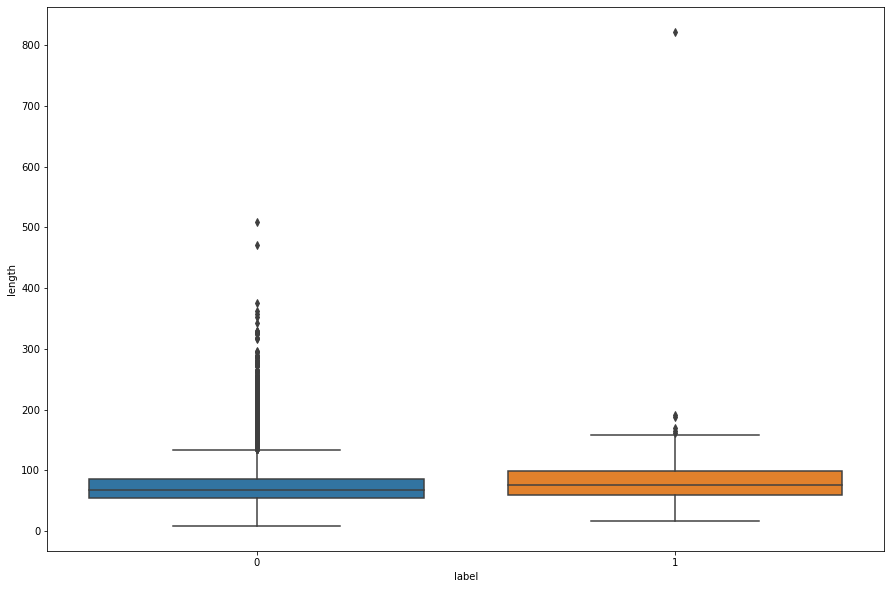

In [24]:
# Looking at the lengths of jokes and their distribution
plt.figure(figsize=(15,10))
train['length'] = train.text.apply(lambda x: len(x))
sns.boxplot(x='label',y='length',data=train)

In [9]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**List of Contractions in English Language: https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions**

In [10]:
# Function to expand the contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    #print(contractions_pattern)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        #print(expanded_contraction)
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    #print(expanded_text)
   # print(expanded_contraction)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Function to clear the punctuations
def clear_punctuations(text):
    text = re.findall(r"[\w']+|[.,!?;]", text)
    text = ' '.join(text)
    return text

In [12]:
# Applying the expand contractions & Clear punctuations functions
train.text = train.text.apply(lambda x : expand_contractions(x))
train.text = train.text.apply(lambda x : clear_punctuations(x))

# Only using Sentences between length 30 & 140
df = train[(train.length >= 30) & (train.length <= 140)]
df = df.reset_index()

In [15]:
# Creating a SentenceBERT Model with Pooling & Dense Layer to train our own model witht he available dataset.
# The maximum length of input string in 200 and the output will be a (200,) matrix.
word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=200)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=200, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

In [16]:
# Splitting all the Jokes and Non Jokes
jks = df.text[df.label == 1]
njks = df.text[df.label == 0]

# Deriving the Sentence Embeddings from our model
jokes = model.encode(jks.tolist())
njokes = model.encode(njks.tolist())

# A Huge matrix of Sentence Embeddings
sentences = np.concatenate((jokes,njokes),axis=0)

#Creating the labels
a = np.ones((len(df[df.label == 1]),))
b = np.zeros((len(df[df.label == 0]),))
labels = np.concatenate((a,b),axis=0)

In [17]:
# Implementing Logit Model to see how a basic binary classifier can classify the jokes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.33, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train,y_train)

#Predicting
preds = model.predict(X_test)

#Evaluating
print(classification_report(y_test,preds))
print("")
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2631
         1.0       0.95      0.93      0.94      1378

    accuracy                           0.96      4009
   macro avg       0.96      0.95      0.96      4009
weighted avg       0.96      0.96      0.96      4009


[[2565   66]
 [  94 1284]]


In [20]:
# Looking at the Sentence Embeddings and seeing how the SBERT Makes Sense
tsne = TSNE(n_components=2, perplexity=30, n_iter= 1000, verbose=1).fit_transform(sentences)

df1 = pd.DataFrame(tsne,columns=['x','y'])
df1['class'] = labels

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12147 samples in 0.279s...
[t-SNE] Computed neighbors for 12147 samples in 70.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12147
[t-SNE] Computed conditional probabilities for sample 2000 / 12147
[t-SNE] Computed conditional probabilities for sample 3000 / 12147
[t-SNE] Computed conditional probabilities for sample 4000 / 12147
[t-SNE] Computed conditional probabilities for sample 5000 / 12147
[t-SNE] Computed conditional probabilities for sample 6000 / 12147
[t-SNE] Computed conditional probabilities for sample 7000 / 12147
[t-SNE] Computed conditional probabilities for sample 8000 / 12147
[t-SNE] Computed conditional probabilities for sample 9000 / 12147
[t-SNE] Computed conditional probabilities for sample 10000 / 12147
[t-SNE] Computed conditional probabilities for sample 11000 / 12147
[t-SNE] Computed conditional probabilities for sample 12000 / 12147
[t-SNE] Computed conditional probabilities for sa

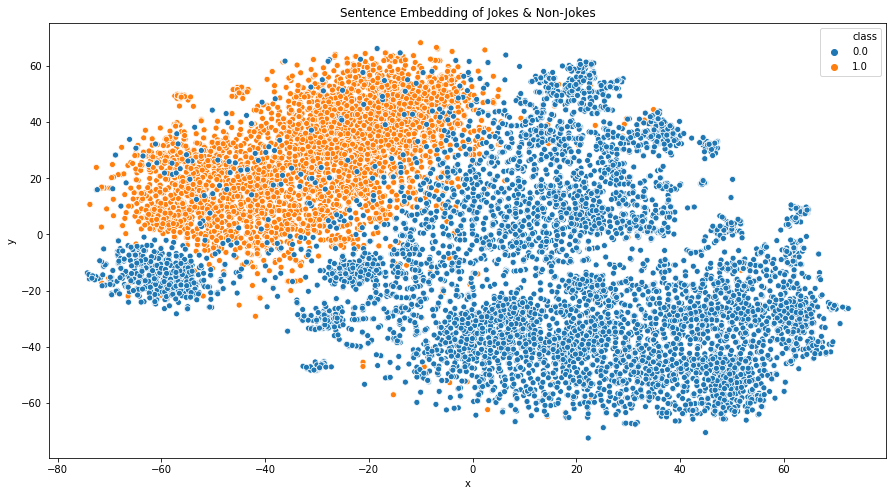

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'x', y = 'y', data=df1, hue='class')
plt.title('Sentence Embedding of Jokes & Non-Jokes')
plt.show()